In [1]:
import numpy as np # linear algebra
import pandas as pd
import tensorboard

In [2]:
import os
print(os.listdir("./Garbage classification/Garbage classification"))
print(os.listdir('./Garbage classification/'))

['Apple(1-5)', 'Apple(10-14)', 'Apple(5-10)', 'Banana(1-5)', 'Banana(10-15)', 'Banana(15-20)', 'Banana(5-10)', 'Carrot(1-2)', 'Carrot(3-4)', 'carrot(5-6)', 'Expired', 'Tomato(1-5)', 'Tomato(10-15)', 'Tomato(5-10)']
['Garbage classification']


In [3]:
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

SyntaxError: cannot assign to operator (<ipython-input-7-5359fa2ad1dd>, line 1)

In [5]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

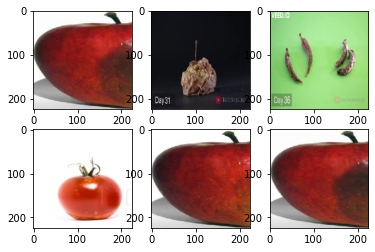

In [8]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = './Garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 1745 images belonging to 14 classes.
Found 187 images belonging to 14 classes.


In [10]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 14))

In [11]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('shelflifelabels.txt', 'w') as f:
  f.write(labels)

{'Apple(1-5)': 0, 'Apple(10-14)': 1, 'Apple(5-10)': 2, 'Banana(1-5)': 3, 'Banana(10-15)': 4, 'Banana(15-20)': 5, 'Banana(5-10)': 6, 'Carrot(1-2)': 7, 'Carrot(3-4)': 8, 'Expired': 9, 'Tomato(1-5)': 10, 'Tomato(10-15)': 11, 'Tomato(5-10)': 12, 'carrot(5-6)': 13}


In [12]:
path = 'shelflifelabels.txt'
label = np.array(open(path).read().splitlines())

In [13]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [12]:
base_model.trainable = False

In [13]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(14 ,activation='softmax')
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
print(train_generator.n )

1745


In [16]:
batch_size = 32
epochs = 60
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

model.fit_generator(train_generator, steps_per_epoch = steps_per_epoch, epochs=epochs, workers=4, validation_data=validation_generator, validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
54/54 [==============================] - 22s 403ms/step - loss: 1.2879 - accuracy: 0.5741 - val_loss: 1.1702 - val_accuracy: 0.5625
Epoch 2/60
54/54 [==============================] - 22s 409ms/step - loss: 0.7275 - accuracy: 0.7185 - val_loss: 1.4559 - val_accuracy: 0.4875
Epoch 3/60
54/54 [==============================] - 21s 395ms/step - loss: 0.6178 - accuracy: 0.7562 - val_loss: 0.8655 - val_accuracy: 0.7375
Epoch 4/60
54/54 [==============================] - 22s 404ms/step - loss: 0.5158 - accuracy: 0.8092 - val_loss: 0.8927 - val_accuracy: 0.6500
Epoch 5/60
54/54 [==============================] - 22s 408ms/step - loss: 0.5018 - accuracy: 0.7939 - val_loss: 1.0981 - val_accuracy: 0.6125
Epoch 6/60
54/54 [==============================] - 22s 410ms/step - loss: 0.5140 - accuracy: 0.8032 - val_loss: 0.9541 - val_accuracy: 0.6375
Epoch 7/60
54/54 [==============================] - 22s 406ms/step

In [17]:
def get_class_string_from_index(index):
   for class_string, class_index in validation_generator.class_indices.items():
      if class_index == index:
         return class_string

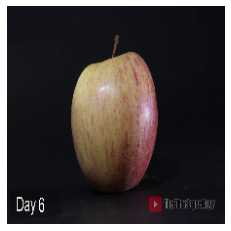

True label: Apple(5-10)
Predicted label: Apple(5-10)


In [31]:
x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [ ]:
img_path = './Garbage classification/Garbage classification/metal/metal15.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = label[np.argmax(p[0][0], axis=-1)]
print(predicted_class)

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

In [ ]:
fine_tune_at = 100

In [ ]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps) 


In [ ]:
x, y = next(validation_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
saved_model_dir = './'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('modelshelflife.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [ ]:
import PIL.Image as Image

In [ ]:
img_path = './Garbage classification/Garbage classification/cardboard/cardboard30.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)